<a href="https://colab.research.google.com/github/MonilMehta/Synapse_LP/blob/CV-week1/Synapse_LP1_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CV Task 1**

## **Synapse Learning Period**
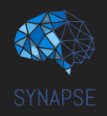

Congratulations on finishing the basic learning period! Now you will specialise in one of the most interesting domains in ML: Computer Vision. If you have been living under a rock and *still* don't know what that is, go through the below link:

https://towardsdatascience.com/everything-you-ever-wanted-to-know-about-computer-vision-heres-a-look-why-it-s-so-awesome-e8a58dfb641e

So yeah, a lot of cool stuff can be done with CV. But before we progress to doing that cool stuff, your basics need to be made very sound, which is what completing this task will do for you.

## mounting drive and importing stuff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv2
import math
%matplotlib inline

## opencv basics

Before we get into this, what even is an image? Get your basics cleared from below:

https://www.analyticsvidhya.com/blog/2021/03/grayscale-and-rgb-format-for-storing-images/

To actually preprocess an image, lets use the wget command to actually import one first.

 * wget is a linux command that helps us download content from the web.
 * we can use the -O flag to store it using a custom name.
 * all linux commands can be accessed in jupyter notebooks using ! before the command.

In [142]:
# run this cell as it is.
!wget -O pika.jpg https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png

--2023-11-27 05:55:59--  https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53612 (52K) [image/png]
Saving to: ‘pika.jpg’

pika.jpg            100%[===================>]  52.36K  --.-KB/s    in 0.007s  

2023-11-27 05:55:59 (7.53 MB/s) - ‘pika.jpg’ saved [53612/53612]



In [3]:
# linux command to see files in current directory. run this cell as it is.
!ls

pika.jpg  sample_data


We read the image using cv.imread().
Then we use plt.imshow() to show the image.

(Why not cv.imshow(), you may ask? For that, refer to the below link:

https://stackoverflow.com/questions/55288657/image-is-not-displaying-in-google-colab-while-using-imshow)

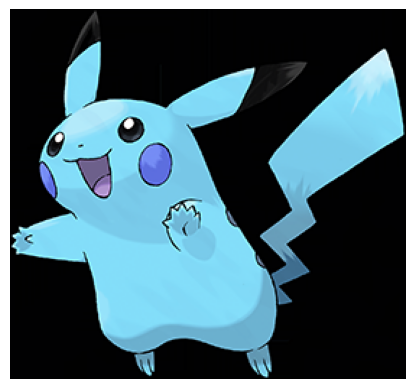

In [4]:
# run this cell as it is.
img = cv2.imread("pika.jpg")
plt.axis('off')
plt.imshow(img)

Why is Pikachu looking like it is doing some very weird Smurf cosplay? Google it and try to find out the reason. Then fix it in the below code cell.

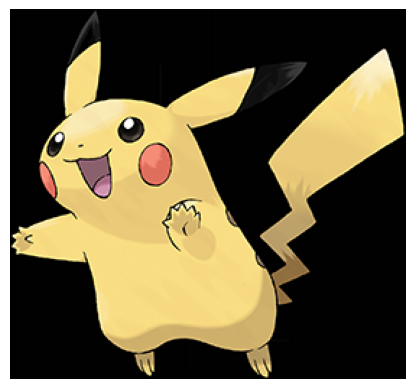

In [5]:
# output should look like the one shown below.
image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image)

Google the one line code to convert image to grayscale in OpenCV and convert the downloaded image to grayscale. Plot the image using plt.imshow(). Remember to set the color map to "gray" (cmap = "gray") in plt.imshow() as plt automatically adds a color filter which is not needed.

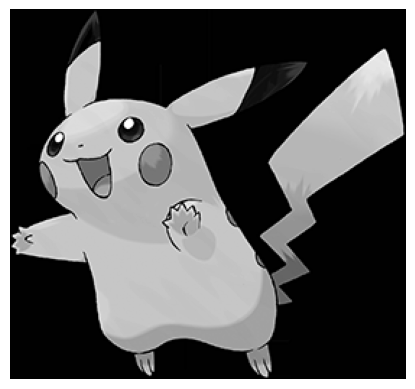

In [6]:
# convert RGB image to grayscale.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray,cmap="gray")

Use cv2.resize() to resize your image to (200, 200) and then show it using plt.

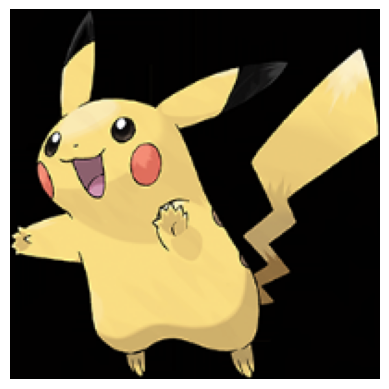

In [7]:
# resize image here.
resize=cv2.resize(image,(200,200))
plt.axis('off')
plt.imshow(resize,cmap="gray")

In [8]:
# the resized image should now have shape (200, 200, 3). check that here.
resize.shape

(200, 200, 3)

Write code for cropping the image from height 70 to 150 and width 50 to 120. Hint: be smart with your slicing while displaying the image.

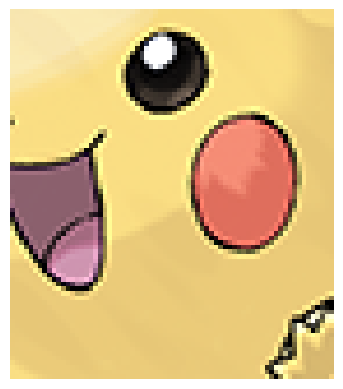

In [9]:
# crop image here. desired output is as shown below.
crop=image[70:150,50:120]
plt.axis('off')
plt.imshow(crop,cmap="gray")

We can also draw lines on images with OpenCV. Lets make our Pikachu buff with some abs.

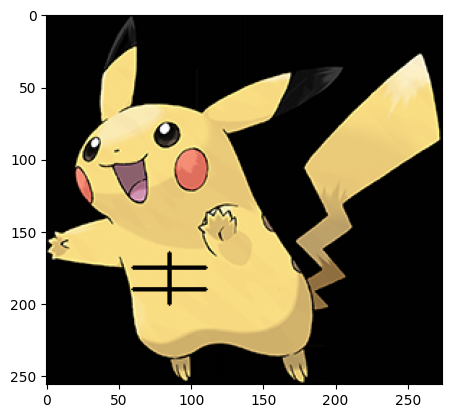

In [10]:
# run this cell as it is.
# to draw horizontal lines.
buff_pikachu = cv2.line(img.copy(), (60, 175), (110, 175), (0, 0, 0), 2)
buff_pikachu = cv2.line(buff_pikachu, (60, 190), (110, 190), (0, 0, 0), 2)
# to draw vertical line.
buff_pikachu = cv2.line(buff_pikachu, (85, 200), (85, 165), (0, 0, 0), 2)
# i kept the axis for better understanding.
plt.imshow(cv2.cvtColor(buff_pikachu, cv2.COLOR_BGR2RGB))

Draw random (sfw) stuff on pikachu. Any shape, any figure is allowed. Resource:
https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html

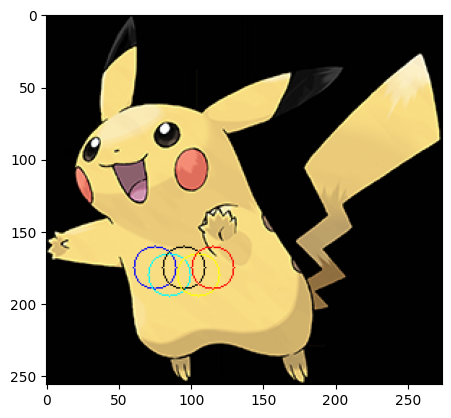

In [11]:
# playground.
play_pikachu=cv2.circle(img.copy(),(75,175), 15, (255,0,0), 1)
play_pikachu=cv2.circle(play_pikachu,(85,180), 15, (255,255,0), 1)
play_pikachu=cv2.circle(play_pikachu,(95,175), 15, (0,0,0), 1)
play_pikachu=cv2.circle(play_pikachu,(105,180), 15, (0,255,255), 1)
play_pikachu=cv2.circle(play_pikachu,(115,175), 15, (0,0,255), 1)
plt.imshow(cv2.cvtColor(play_pikachu, cv2.COLOR_BGR2RGB))

## convolution

Before we do move ahead, we feel it important that you clearly understand what convolution is. A lot of stuff in preprocessing and in edge detection also involves convolving images.

Y'all must have studied the formula for convolution of two functions somewhere in your Engineering Maths III portion. If not, this is what the formula for it looks like:

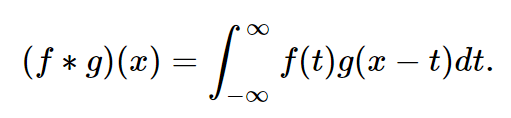

Yeah, they must have skipped over the part about how it is actually useful and just made you do a million integrals for it. To get a feel for what it exactly is, go through the resource below:

https://youtu.be/KuXjwB4LzSA?si=wc7iLGuUYEOw8TwA

As you may now know, it has use cases all over mathematics. But from an image processing point of view, this below GIF is essentially what it looks like:

<img src='https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif' height='350px' >

For a clearer explanation, see the below video:

https://youtu.be/Etksi-F5ug8?si=pXAvAQJtPKa0s19v

All that should have made your concepts extremely clear. If not, go through the resources again.

Time to get your hands dirty now. As you may have realised, we first flip the kernel before convolving the image. So, write a function for flipping a two dimensional matrix horizontally from scratch. Try do an in-place flip to improve space complexity.

In [12]:
def flip(kernel):
  # replace pass with a return statement. use your own logic here.
  # if you directly use cv2.flip() or something inbuilt like that, to maar khaoge fr.
  # hint: look into something called the two pointers approach for an optimised solution.
  # img2=np.zeros_like(kernel)
  img2=np.zeros_like(kernel)
  for i in range(kernel.shape[1]):
    img2[:,i]=kernel[:,kernel.shape[1]-i-1]
  return img2

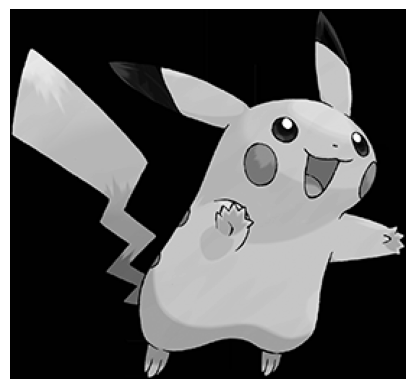

In [13]:
# run this cell as it is to check the output.
plt.axis('off')
# using a copy as the function does the flipping in-place.
plt.imshow(flip(gray.copy()), cmap = "gray")

Now, write a function to perform basic convolution. Assume that the image is grayscale so there is only one channel instead of the usual RBG channels. Note that kernels will always be a square matrix while an image can be of any shape.

Hint: Use slicing instead of for loops while performing addition operations.

In [14]:
def convolution(kernel, image):
  # replace pass with a return statement. needless to say, use your own logic here as well.
  # if we see np.convolve() anywhere here, taane sunoge ham sabse.
  # don't forget to flip the kernel with the above flip() function. that makes this a convolution function, else it is a cross-correlation function.
  flipped=flip(kernel)

  kernel_h,kernel_w=kernel.shape
  image_h,image_w=image.shape

  output_h=image_h-kernel_h+1
  output_w=image_w-kernel_w+1

  output=np.zeros((output_h,output_w))

  for i in range(output_h):
    for j in range(output_w):
      input1=image[i:i+kernel_h,j:j+kernel_w]
      output[i][j]=np.sum(input1*flipped)

  return output


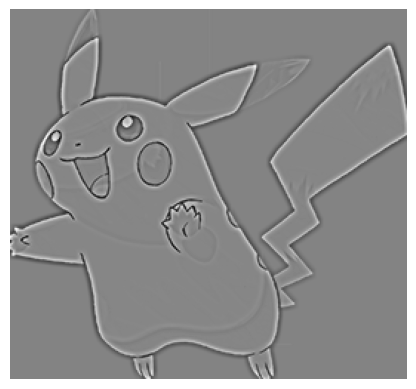

In [15]:
# run this cell as it is to check the output.
kernel = np.array([
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 49, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1]
]) # 7 x 7 kernel to sharpen images.
plt.axis('off')
plt.imshow(convolution(kernel, gray), cmap = 'gray')

Here, you can see that we lose the border pixels (notice that pikachu's toes and fingers have been nibbled at by our kernel).

In [16]:
# shape is changed after convolution.
print("Shape before convolution =", gray.shape)
print("Shape after convolution =", convolution(kernel, gray).shape)

Shape before convolution = (256, 274)
Shape after convolution = (250, 268)


What if we want to ensure the output image is the same size as that of the input image? There we use something called padding. Resource:

https://youtu.be/PGBop7Ka9AU?si=zWKktXnDL1bN_iCE

Also, there is something called "stride" in convolution as well. Resource:

https://youtu.be/lxk_nmpqI5M?si=SCnShMXeGLRyDsBj

Implement a convolution function with stride in parameters. Use zero padding to pad the images.

In [17]:
def convolution_with_stride(kernel, image, stride):
  flipped = np.flip(kernel)

  kernel_h, kernel_w = kernel.shape
  image_h, image_w = image.shape

  # Calculate the padding needed to keep the output shape the same as the input shape
  pad_top = (kernel_h - 1) // 2
  pad_bottom = kernel_h - 1 - pad_top
  pad_left = (kernel_w - 1) // 2
  pad_right = kernel_w - 1 - pad_left
  output_h = image_h
  output_w = image_w

  output = np.zeros((output_h, output_w))


  # Pad the input image
  padded_image = np.pad(image, ((pad_top, pad_bottom), (pad_left, pad_right)), mode='constant')
  # Perform convolution without stride
  for i in range(output_h):
      for j in range(output_w):
          input1 = padded_image[i : i + kernel_h, j : j + kernel_w]
          output[i, j] = np.sum(input1 * flipped)

  return output

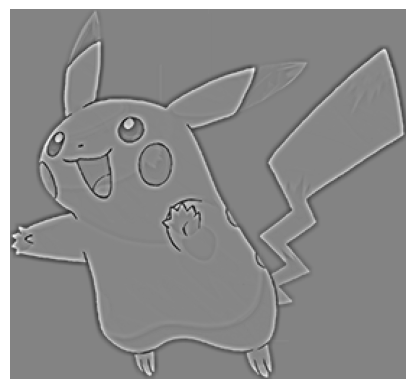

In [18]:
plt.axis('off')
plt.imshow(convolution_with_stride(kernel, gray, 1), cmap = 'gray')

This maintains both the original shape of the image as well as Pikachu's toes and fingers.

In [19]:
# shape should now be the same.
print("Shape before convolution =", gray.shape)
print("Shape after convolution =", convolution_with_stride(kernel, gray, 1).shape)

Shape before convolution = (256, 274)
Shape after convolution = (256, 274)


Play around with the stride parameter to see how it affects the convolution operation and its shape.

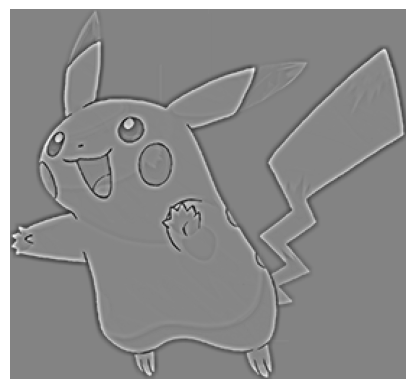

In [20]:
# playground.
plt.axis('off')
plt.imshow(convolution_with_stride(kernel, gray, 5), cmap = 'gray')

In the last task, we saw that we could do all of the above with Tensorflow. So why did we make you do all this? Because the underlined parameters in the below image of Conv2D layer's parameters will now make much more sense.

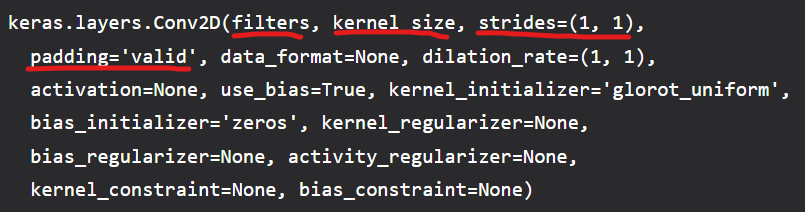

Apart from clearing your convolution concepts, it also hopefully made y'all realise the importance of DSA and how much thought goes into each inbuilt function that we usually directly import and apply. It is basic stuff like this that is sometimes modified into LeetCode problems. Examples:

https://leetcode.com/problems/flipping-an-image/

https://leetcode.com/problems/rotate-image/

#bonus

So, let us attempt the rotate image problem as a brownie points question.

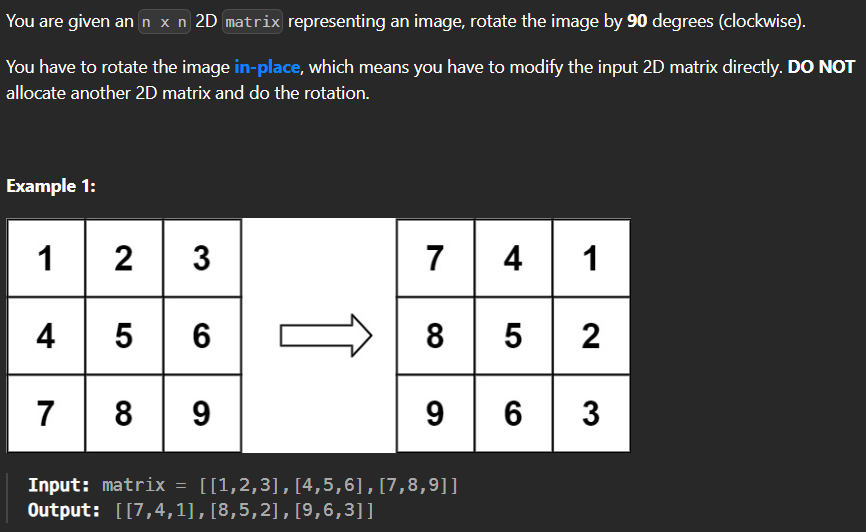

Write a function to do the above in the below code cell for our image. Modify matrix in-place.

1,1 -> 1,3

1,2->2,3

1,3->3,3

2,1->1,2

2,2->2,2

2,3->3,2

3,1->1,1

3,2->2,1

3,3->3,1

In [21]:
def rotate(image):
  image_h,image_w=image.shape
  for i in range(image_h//2):
    for j in range(i,image_w-i-1):
      temp=image[i][j]
      image[i][j]=image[j][image_h-1-i]
      image[j][image_h-1-i]=temp

TypeError: ignored

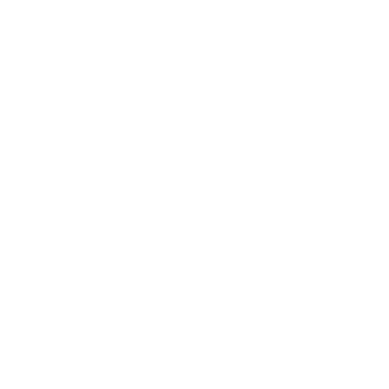

In [23]:
# run this cell as it is to check the output.
plt.axis('off')
# i resized the image to be a square one. care to wonder why?
plt.imshow(rotate(cv2.resize(gray, (200, 200), interpolation = cv2.INTER_AREA)), cmap = "gray")

## preprocessing images

That was a lot of brouhaha over convolution. Hopefully your functions are correct (test them out before starting this part!), as they are now going to be used for image preprocessing.

Just like we would preprocess DataFrames before actually doing any ML with them in the previous tasks, images need to be preprocessed first before applying algorithms on them as well. Resource:

https://www.analyticsvidhya.com/blog/2023/03/getting-started-with-image-processing-using-opencv/

A lot of preprocessing is just using special kernels to convolve over an image to yield certain output. The below images show some staple kernels and their usecases.

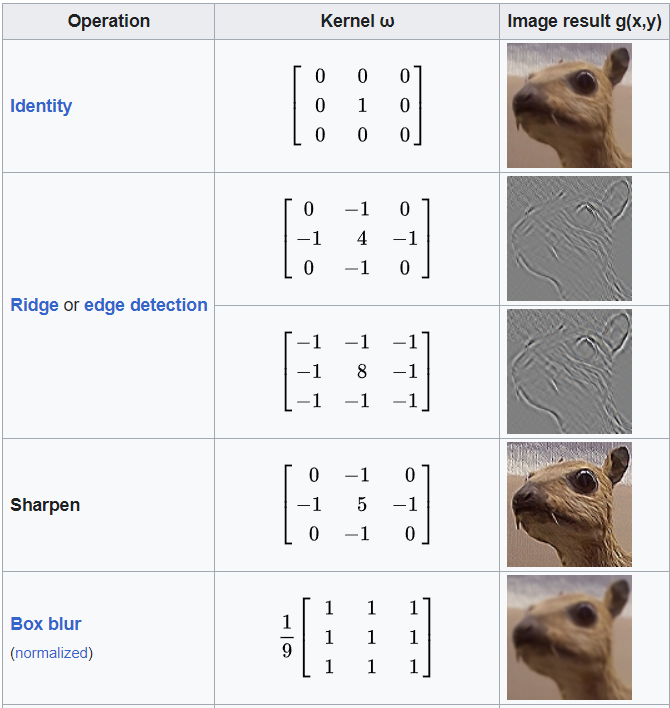
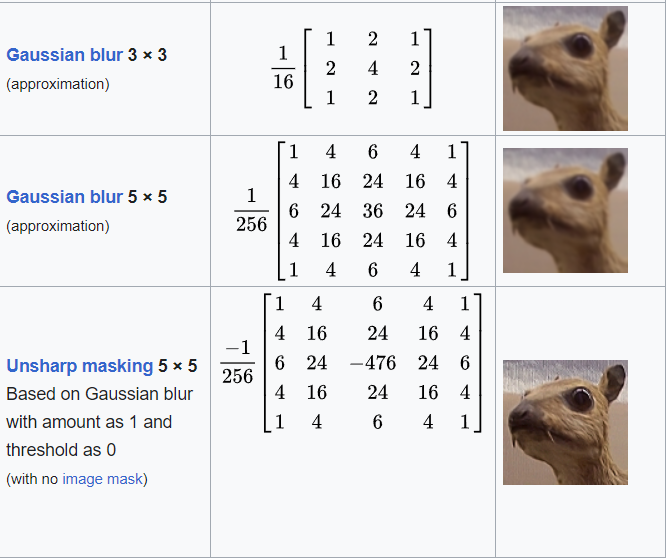

The earlier kernel we applied to test our convolution functions is called a sharpening filter, used used to accentuate the edges of the image and add contrast to them.

# blurring

Blurring is used to reduce noise in the image. The most common type is Gaussian Blur. Resource:

https://youtu.be/C_zFhWdM4ic?si=RPWKZi6MvS7SX32v

Let us apply Gaussian Blur on our given Pikachu image. The earlier convolution functions you've written will be quite handy now.

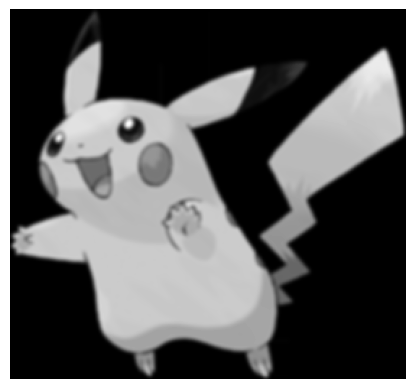

In [24]:
# run this cell as it is.
gb_kernel = np.array([
    [0.000798, 0.006581, 0.013347, 0.018614, 0.013347, 0.006581, 0.000798],
    [0.006581, 0.054223, 0.109394, 0.152377, 0.109394, 0.054223, 0.006581],
    [0.013347, 0.109394, 0.221008, 0.307116, 0.221008, 0.109394, 0.013347],
    [0.018614, 0.152377, 0.307116, 0.427661, 0.307116, 0.152377, 0.018614],
    [0.013347, 0.109394, 0.221008, 0.307116, 0.221008, 0.109394, 0.013347],
    [0.006581, 0.054223, 0.109394, 0.152377, 0.109394, 0.054223, 0.006581],
    [0.000798, 0.006581, 0.013347, 0.018614, 0.013347, 0.006581, 0.000798]
]) # 7 x 7 kernel for Guassian Blur.
plt.axis('off')
plt.imshow(convolution_with_stride(gb_kernel, gray, 1), cmap = 'gray')

Obviously, in practice we use inbuilt functions for all this. Look into the official docs for the various types of blurs and their implementations:

https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

Apply Median Blur using OpenCV functions.

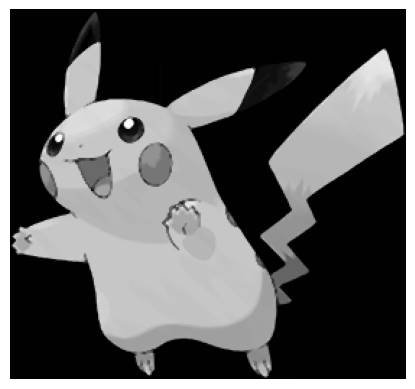

In [25]:
# apply Median Blur.
median=cv2.medianBlur(gray,3)
plt.axis('off')
plt.imshow(median, cmap = 'gray')

Apply Bilateral Filtering and show the output.

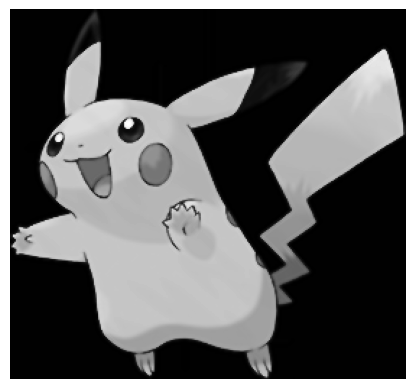

In [26]:
# apply Bilateral Filtering.
blyat=cv2.bilateralFilter(gray,5,75,75)
plt.axis('off')
plt.imshow(blyat, cmap = 'gray')

##Hough Transform and Edge Detection

Download the image in the given drive link. Save it in your own drive.

https://drive.google.com/drive/folders/1ixpJaI7_iKm9kV-yWK0hcjhOkVZDe63b?usp=sharing

This is the TT1 schedule of this semester of a friend of mine from a different branch. Our task is to find all the vertical edges in it.

Some specific steps need to be followed for this, and each step's code reference is easily found online by simple Google searches. So, only theory resources are given for this section, none for implementation.

In [27]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


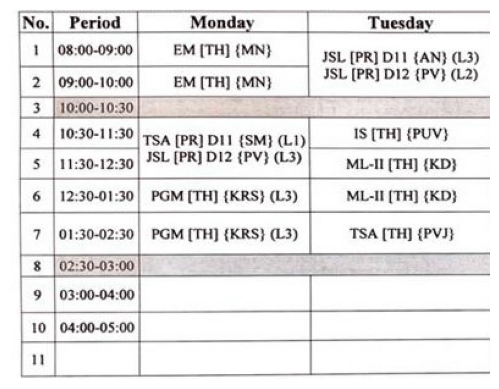

In [126]:
# read the TT timetable image and display it.
tt=cv2.imread('/content/gdrive/MyDrive/Synapse/csvs/tt1.jpeg')
plt.axis('off')
plt.imshow(tt, cmap = 'gray')

Step 1: Convert image to grayscale.

(Note: We usually convert to black and white, but here that would mean loss of vertical edges in the image as they are themselves black. Hence, we don't do that in this case.)

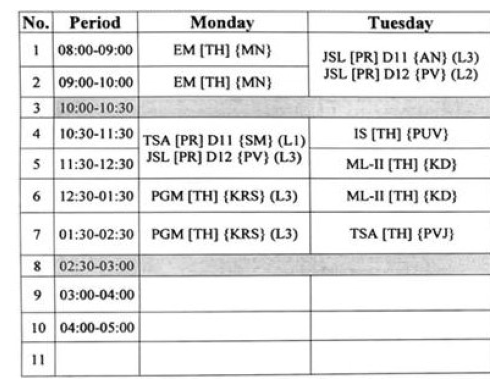

In [127]:
# convert to grayscale and show image.
tt1=cv2.cvtColor(tt,cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(tt1,cmap='gray')

Step 2: Apply Gaussian Blur with OpenCV functions.

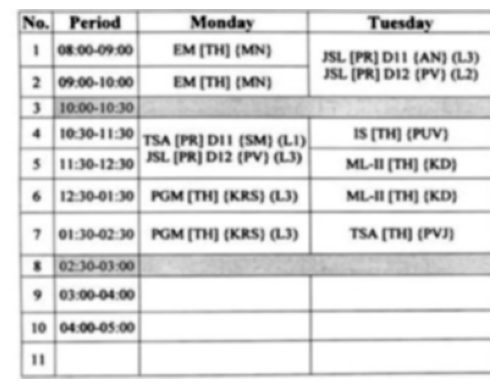

In [128]:
# apply Gaussian Blur and show image.
tt_blur=cv2.GaussianBlur(tt1,(5,5),0)
plt.axis('off')
plt.imshow(tt_blur,cmap='gray')

Step 3: Apply Canny Edge detection. Resources:

https://youtu.be/uihBwtPIBxM?si=dzspcgGtKxSAsgV7

https://youtu.be/sRFM5IEqR2w?si=0775wZiBu9uN6lEX

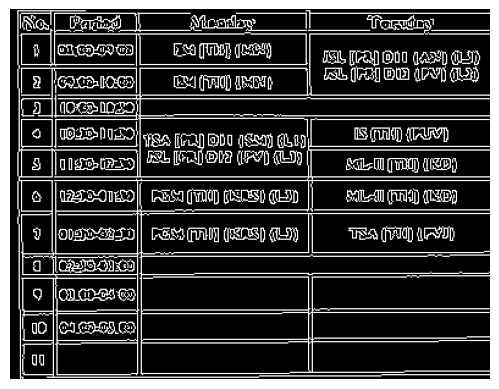

In [129]:
# apply Canny Edge detection and show image.
edges=cv2.Canny(tt_blur,60,200)
plt.axis('off')
plt.imshow(edges,cmap='gray')

Step 4: Now, we use the HoughLinesP (probabilistic hough transform) for actual vertical line detection. Resources:

https://youtu.be/4zHbI-fFIlI?si=RkV_z7FE6iLKYLQV

https://www.analyticsvidhya.com/blog/2022/06/a-complete-guide-on-hough-transform/

In [108]:
# detect vertical lines. feel free to add and remove parameters as you deem appropriate.
lines = cv2.HoughLinesP(image = edges, # insert image.
                       rho = 1, # insert appropriate value.
                       theta = np.pi/180, # insert appropriate value.
                       threshold = 30, # insert appropriate value.
                       minLineLength = 50, # insert appropriate value.
                       maxLineGap = 200) # insert appropriate value.

# initialize an empty 1-D list to store vertical line coordinates.
coordinates = []

# collect coordinates of detected vertical lines.
for line in lines:
    x1, y1, x2, y2 = line[0] # insert appropriate variable.
    angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi # insert appropriate variable(s).

    # filter out vertical lines.
    if 85<abs(angle)<95: # insert appropriate value for angle.
        coordinates.append((x1, y1, x2, y2))
        # draw the line on the original image.
        cv2.line(tt, (x1, y1), (x2, y2), (0, 0, 0), 1)

for x1, y1, x2, y2 in coordinates:
  print(f"Vertical Line: ({x1}, {y1}) - ({x2}, {y2})")

Vertical Line: (6, 141) - (8, 301)
Vertical Line: (104, 298) - (104, 74)
Vertical Line: (107, 298) - (107, 71)
Vertical Line: (33, 2) - (38, 301)
Vertical Line: (244, 295) - (244, 72)
Vertical Line: (6, 2) - (11, 298)
Vertical Line: (247, 296) - (247, 138)
Vertical Line: (35, 301) - (35, 201)


Let us see our final results on our original image. Show the modified original image.

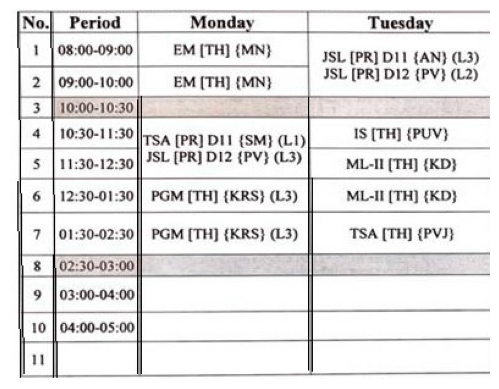

In [109]:
# best output that we could get. every line is kinda detected, but its not perfect.
plt.axis('off')
plt.imshow(tt, cmap='gray')

Play around with the above code snippets in new cells to obtain even better results for detecting vertical edges.

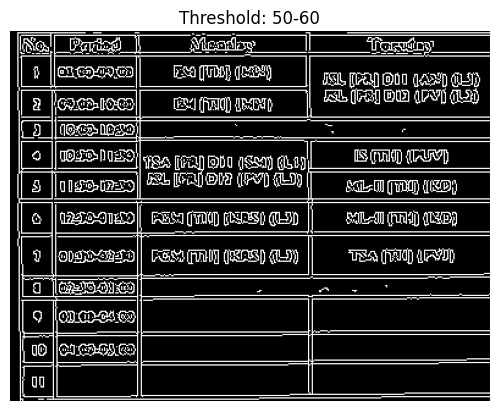

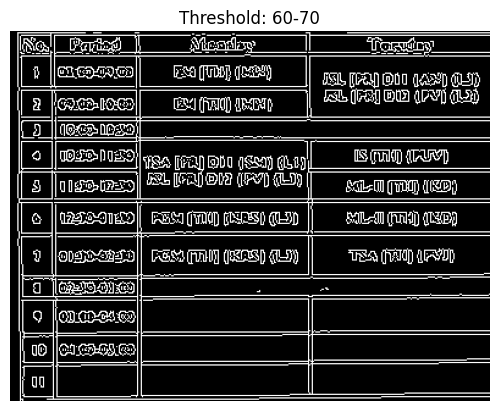

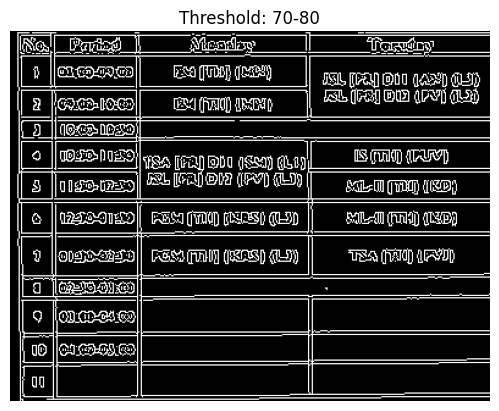

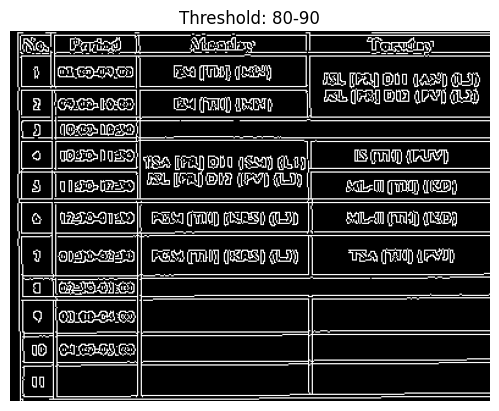

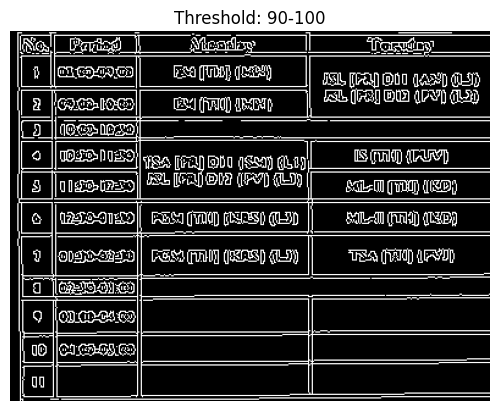

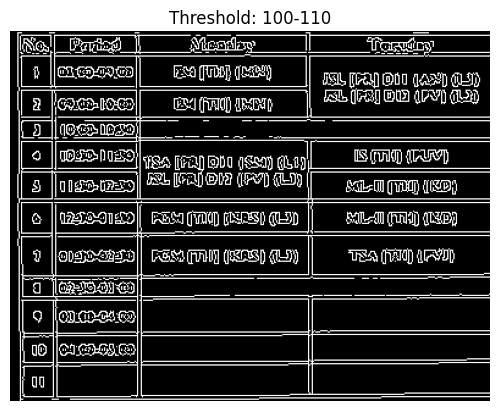

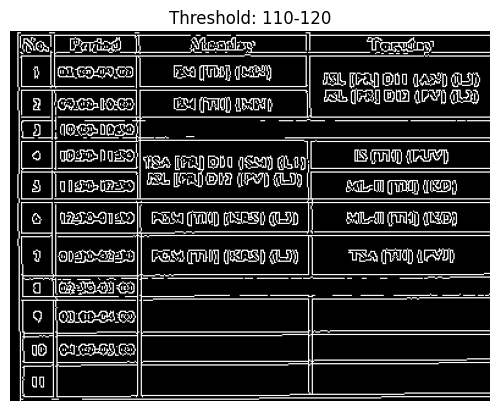

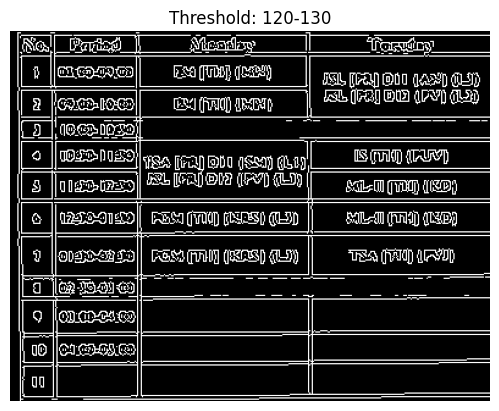

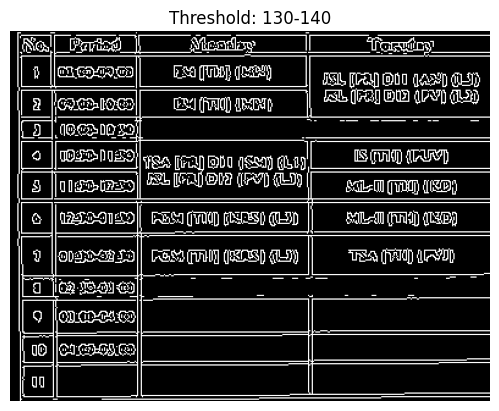

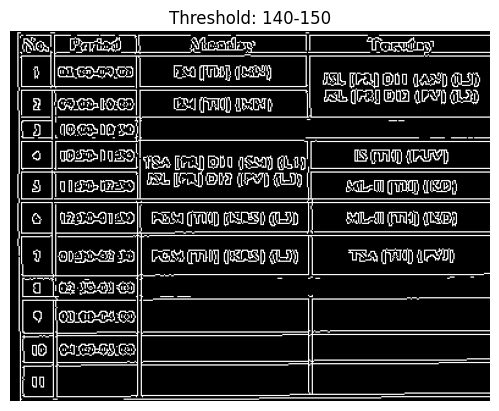

In [130]:
# playground.
# apply Canny Edge detection and show image.
for i in range(50, 150, 10):
    # Apply Canny edge detection
    edges = cv2.Canny(tt_blur, i, i + 10)

    # Plot the image with edges
    plt.figure()
    plt.axis('off')
    plt.imshow(edges, cmap='gray')
    plt.title(f'Threshold: {i}-{i+10}')

# Display the plot
plt.show()

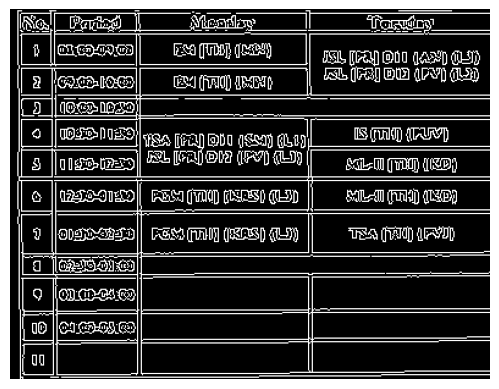

In [131]:
edges=cv2.Canny(tt_blur,90,100)
plt.axis('off')
plt.imshow(edges,cmap='gray')

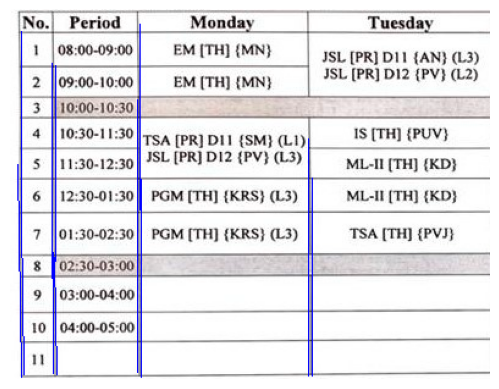

In [158]:
# detect vertical lines. feel free to add and remove parameters as you deem appropriate.
lines = cv2.HoughLinesP(image = edges, # insert image.
                       rho = 1, # insert appropriate value.
                       theta = np.pi/180, # insert appropriate value.
                       threshold = 50, # insert appropriate value.
                       minLineLength = 50, # insert appropriate value.
                       maxLineGap = 20) # insert appropriate value.

# initialize an empty 1-D list to store vertical line coordinates.
coordinates = []

# collect coordinates of detected vertical lines.
for line in lines:
    x1, y1, x2, y2 = line[0] # insert appropriate variable.
    angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi # insert appropriate variable(s).

    # filter out vertical lines.
    if 85<abs(angle)<95: # insert appropriate value for angle.
        coordinates.append((x1, y1, x2, y2))
        # draw the line on the original image.
        cv2.line(tt, (x1, y1), (x2, y2), (0, 0, 255), 1)

for x1, y1, x2, y2 in coordinates:
  print(f"Vertical Line: ({x1}, {y1}) - ({x2}, {y2})")



# best output that we could get. every line is kinda detected, but its not perfect.
plt.axis('off')
plt.imshow(tt, cmap='gray')

In [143]:
#edge detection of another object
!wget -O sky.jpg https://www.pngall.com/wp-content/uploads/2/Skyscraper-PNG-HD-Image.png

--2023-11-27 05:56:15--  https://www.pngall.com/wp-content/uploads/2/Skyscraper-PNG-HD-Image.png
Resolving www.pngall.com (www.pngall.com)... 78.159.114.6
Connecting to www.pngall.com (www.pngall.com)|78.159.114.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/png]
Saving to: ‘sky.jpg’

sky.jpg                 [ <=>                ] 182.12K  --.-KB/s    in 0.03s   

2023-11-27 05:56:15 (5.30 MB/s) - ‘sky.jpg’ saved [186494]



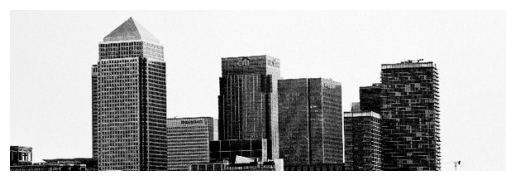

In [146]:
sky = cv2.imread('sky.jpg', cv2.IMREAD_COLOR)
sky_rgb = cv2.cvtColor(sky, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(sky_rgb)

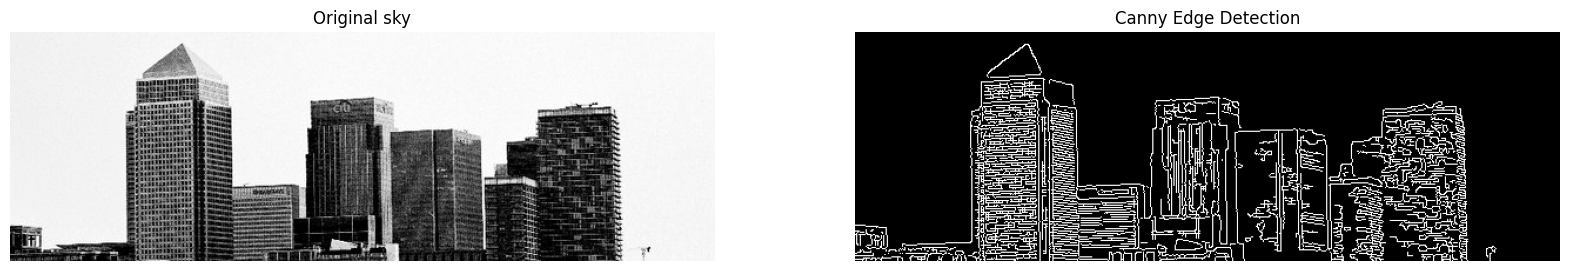

In [154]:

# Apply Gaussian blur to reduce noise
sky_blur = cv2.GaussianBlur(sky, (5, 5), 0)

# Perform Canny edge detection
edges1 = cv2.Canny(sky_blur, 50, 150)  # You may need to adjust the threshold values

# Display the original sky and edges
plt.figure(figsize=(20, 10))

plt.subplot(121), plt.imshow(sky, cmap='gray')
plt.title('Original sky'), plt.axis('off')

plt.subplot(122), plt.imshow(edges1, cmap='gray')
plt.title('Canny Edge Detection'), plt.axis('off')

plt.show()

# **bonus: to be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Transfer Learning.** The best research will be edited and featured on the Synapse Instagram and LinkedIn pages. Happy coding! :)

# **End of Task**

> ©Synapse 2023 - 2024

